## Diminos Store - Delivery Time

#### Recently Diminos gave a notice to Kanav that they will be measuring their stores' performance by looking at the metric - which is 95th Percentile on Order Delivery time should be less than 31 mins.


> Documentation link - https://docs.google.com/document/d/1nouEKYjtXnHmoEaSsdRwLUhl9HHeBYnDz_l2L52vuyY/edit

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir(r"C:\Users\RITWIK GANGULY\Downloads\Innomatics Research Lab")

In [3]:
df = pd.read_csv("diminos_data.csv")

In [4]:
df

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [11]:
df.describe(include="all")

,order_id,order_placed_at,order_delivered_at
count,1.500000e+04,15000,15000
unique,NaN,14953,15000
top,NaN,2023-03-27 10:46:29,2023-03-01 00:18:07.443132
freq,NaN,2,1
mean,1.530610e+06,NaN,NaN
std,4.330271e+03,NaN,NaN
min,1.523111e+06,NaN,NaN
25%,1.526861e+06,NaN,NaN
50%,1.530610e+06,NaN,NaN
75%,1.534360e+06,NaN,NaN


In [14]:
# change object to datetime format
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [17]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [18]:
# day of month
df.order_placed_at.dt.day

0         1
1         1
2         1
3         1
4         1
         ..
14995    27
14996    27
14997    27
14998    27
14999    27
Name: order_placed_at, Length: 15000, dtype: int64

In [19]:
# day of year
df.order_placed_at.dt.year

0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
14995    2023
14996    2023
14997    2023
14998    2023
14999    2023
Name: order_placed_at, Length: 15000, dtype: int64

In [24]:
# day of week
df.order_placed_at.dt.day_of_week #monday=0 and so on

0        2
1        2
2        2
3        2
4        2
        ..
14995    0
14996    0
14997    0
14998    0
14999    0
Name: order_placed_at, Length: 15000, dtype: int64

In [25]:
df["day_of_month"] = df.order_placed_at.dt.day

In [28]:
df["day_of_week"] = df.order_placed_at.dt.day_name()

In [29]:
df

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday
...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,27,Monday
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,27,Monday
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,27,Monday
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,27,Monday


In [39]:
# total time in minute
df["delivary_time"] = (df.order_delivered_at - df.order_placed_at).dt.total_seconds()/60

In [40]:
df

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week,delivary_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday,16.176984
...,...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,27,Monday,15.540156
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,27,Monday,16.744549
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,27,Monday,15.411271
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,27,Monday,15.963506


In [52]:
# visualize the frequency of order through out the march month
fr = df.day_of_month.value_counts().sort_index()
fr

1     550
2     588
3     534
4     567
5     551
6     582
7     570
8     578
9     564
10    587
11    536
12    582
13    526
14    492
15    540
16    545
17    537
18    559
19    526
20    597
21    520
22    591
23    583
24    565
25    547
26    532
27    551
Name: day_of_month, dtype: int64

<AxesSubplot:>

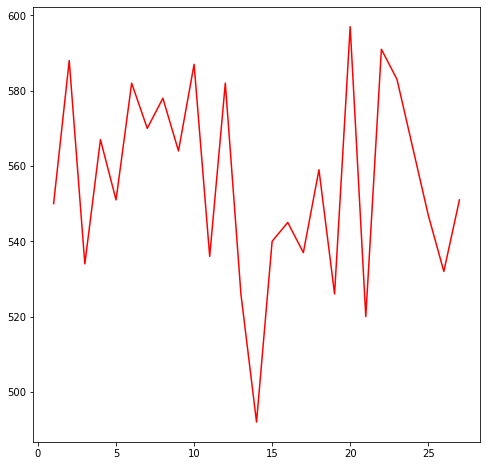

In [61]:
# line plot of the frequency of order
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
sns.lineplot(data = fr, x=fr.index, y = fr.values, color="red")

<AxesSubplot:>

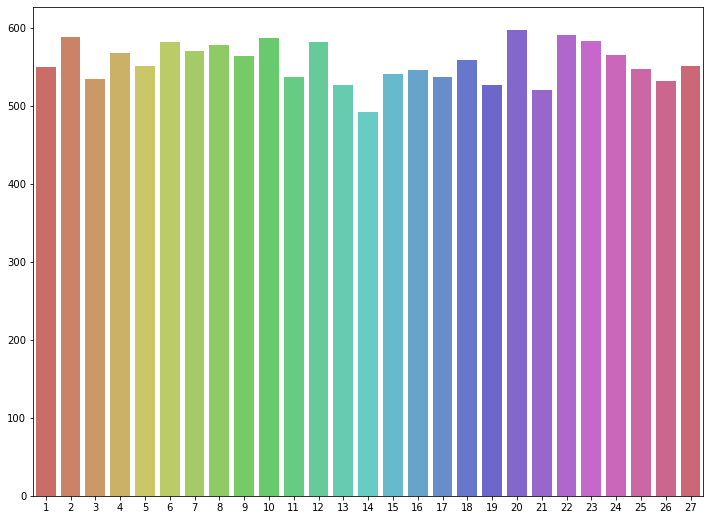

In [71]:
# bar plot of the frequency of order
plt.figure(figsize=(12, 9))
sns.barplot(x=fr.index, y=fr.values, palette='hls')

In [78]:
week = df.day_of_week.value_counts()
week

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: day_of_week, dtype: int64

<AxesSubplot:>

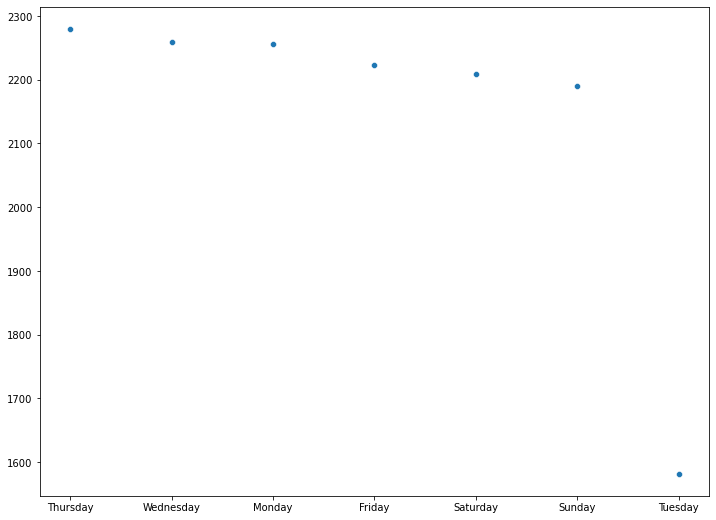

In [81]:
plt.figure(figsize=(12, 9))
sns.scatterplot(x=week.index, y=week.values)

In [82]:
c=0
for i in df.delivary_time:
    if i > 40.0:
        c = c+1
        
print(c)

331


In [84]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at', 'day_of_month',
       'day_of_week', 'delivary_time'],
      dtype='object')

In [86]:
df.groupby("day_of_month")["delivary_time"].mean()

day_of_month
1     19.654617
2     18.984281
3     19.522054
4     19.998816
5     19.690572
6     18.616885
7     18.732610
8     28.056317
9     17.646582
10    32.341166
11    18.703070
12    19.166320
13    19.350507
14    19.825649
15    18.223202
16    19.310278
17    17.768794
18    17.775899
19    32.734740
20    20.592780
21    19.293540
22    20.623125
23    18.024689
24    18.001157
25    18.289338
26    24.903235
27    17.455159
Name: delivary_time, dtype: float64

- we can see on 10th and 19th Match the avarage delivary time of products are greater than 32 minutes which is very big in number.

In [87]:
# we can take a thresold time as 40 minutes and make the 
# delivary time more than 40 minutes to strict 40.

def tranform(x):
    if x>40:
        return 40
    else:
        return x

    
df.delivary_time = df.delivary_time.apply(tranform)    

In [88]:
# the result
c=0
for i in df.delivary_time:
    if i > 40.0:
        c = c+1
        
print(c)

0


In [89]:
# to find the mean delivary time
df.delivary_time.mean()

17.50021796338111

In [90]:
# to find the median
df.delivary_time.median()

15.797986066666668

In [91]:
# to find the top 25%
df.delivary_time.quantile(0.25)

15.274825995833334

In [92]:
# to find the top 75%
df.delivary_time.quantile(0.75)

17.27966090416667

#### The ultiate aim is to be the 95 % time will be in between 31 minutes

In [93]:
# to find the top 95%
df.delivary_time.quantile(0.95)

27.261043996666658

In [94]:
df["ordered_time"] = df.order_placed_at.dt.time

In [105]:
df.ordered_time = df.ordered_time.astype("str")

In [106]:
df["hour"] = df.ordered_time.str[:].str[:2]

In [ ]:
+96+

In [107]:
# 06:00:00 to 12:00:00 - morning
# 12:00:00 to 16:00:00 - afternoon
# 16:00:00 to 20:00:00 - evening
# 20:00:00 to 00:00:00 - night
# 00:00:00 to 06:00:00 - mid-night
def food(x):
    if x >= '00' and x<'06':
        return "mid-night"
    
    elif x >= '06' and x<'12':
        return "morning"
    elif x >= '12' and x<'16':
        return "afternoon"
    elif x >= '16' and x<'20':
        return "evening"
    elif x >= '20' and x<='23':
        return "night"
    
df["mood"] = df.hour.apply(food)

In [108]:
df.mood

0        mid-night
1        mid-night
2        mid-night
3        mid-night
4        mid-night
           ...    
14995        night
14996        night
14997        night
14998        night
14999        night
Name: mood, Length: 15000, dtype: object

In [111]:
rg = df.mood.value_counts()
rg

mid-night    3744
morning      3736
night        2554
evening      2486
afternoon    2480
Name: mood, dtype: int64

<AxesSubplot:>

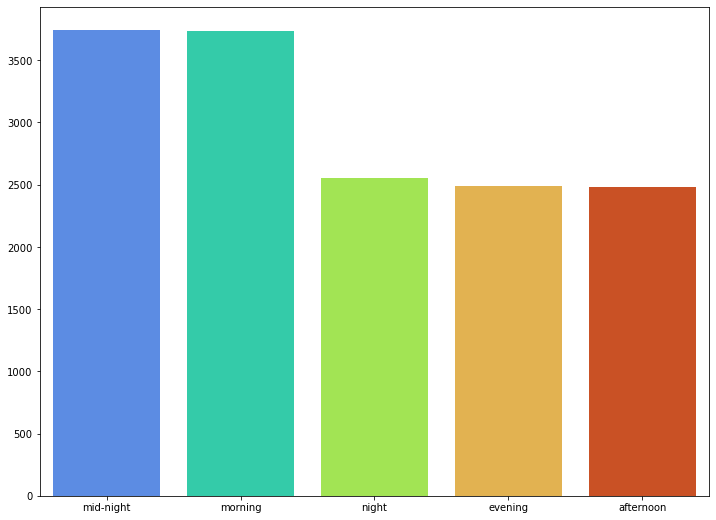

In [112]:
# delivary time barplot
plt.figure(figsize=(12, 9))
sns.barplot(x=rg.index, y=rg.values, palette='turbo')

## Thanks for Visiting